In [1]:
##Import the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import preprocessing 
from sklearn.metrics import accuracy_score
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

In [2]:
##reading the dataset

data = pd.read_csv('bank.csv',delimiter=";")
data

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


In [3]:
##Checking the rows and columns

data.shape

(250, 7)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   industrial_risk         250 non-null    float64
 1    management_risk        250 non-null    float64
 2    financial_flexibility  250 non-null    float64
 3    credibility            250 non-null    float64
 4    competitiveness        250 non-null    float64
 5    operating_risk         250 non-null    float64
 6    class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


In [5]:
##Checking the index of the columns

data.columns

Index(['industrial_risk', ' management_risk', ' financial_flexibility',
       ' credibility', ' competitiveness', ' operating_risk', ' class'],
      dtype='object')

In [6]:
data.dtypes

industrial_risk           float64
 management_risk          float64
 financial_flexibility    float64
 credibility              float64
 competitiveness          float64
 operating_risk           float64
 class                     object
dtype: object

In [7]:
##Checking for missing values in a dataset

data.isnull().any()

industrial_risk           False
 management_risk          False
 financial_flexibility    False
 credibility              False
 competitiveness          False
 operating_risk           False
 class                    False
dtype: bool

In [8]:
data.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy


In [9]:
data.tail()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy
249,1.0,0.0,0.5,0.5,1.0,1.0,non-bankruptcy


In [10]:
##Checking statistics for numerical columns

data.describe()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.518000,0.614000,0.376000,0.470000,0.476000,0.570000
std,0.411526,0.410705,0.401583,0.415682,0.440682,0.434575
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
data["class_yn"] = 1
data

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class,class_yn
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy,1
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy,1
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy,1
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy,1
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy,1
...,...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy,1
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy,1
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy,1
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy,1


In [12]:
##Here we are changing the target variable to bankruptcy = 0, non-bankruptcy = 1

data.loc[data[' class'] == 'bankruptcy', 'class_yn'] = 0

In [13]:
data

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class,class_yn
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy,0
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy,0
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy,0
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy,0
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy,0
...,...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy,1
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy,1
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy,1
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy,1


In [14]:
data.drop(' class', inplace = True, axis =1)
data.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class_yn
0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.5,0.0,0.0,0.5,0.0,1.0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0


In [15]:
data.corr()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class_yn
industrial_risk,1.000000,0.255127,-0.162624,-0.014438,-0.257814,0.144507,-0.227823
management_risk,0.255127,1.000000,-0.254845,-0.303341,-0.306568,0.213874,-0.370838
financial_flexibility,-0.162624,-0.254845,1.000000,0.524951,0.686612,-0.116903,0.751020
credibility,-0.014438,-0.303341,0.524951,1.000000,0.675689,-0.288458,0.755909
competitiveness,-0.257814,-0.306568,0.686612,0.675689,1.000000,-0.211383,0.899452
operating_risk,0.144507,0.213874,-0.116903,-0.288458,-0.211383,1.000000,-0.279786
class_yn,-0.227823,-0.370838,0.751020,0.755909,0.899452,-0.279786,1.000000


<Axes: >

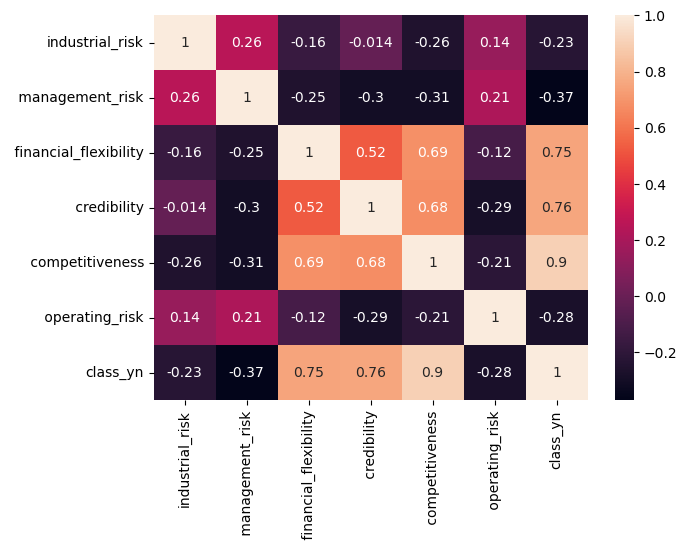

In [16]:
plt.figure(figsize = (7,5))
sns.heatmap(data.corr(), annot = True)

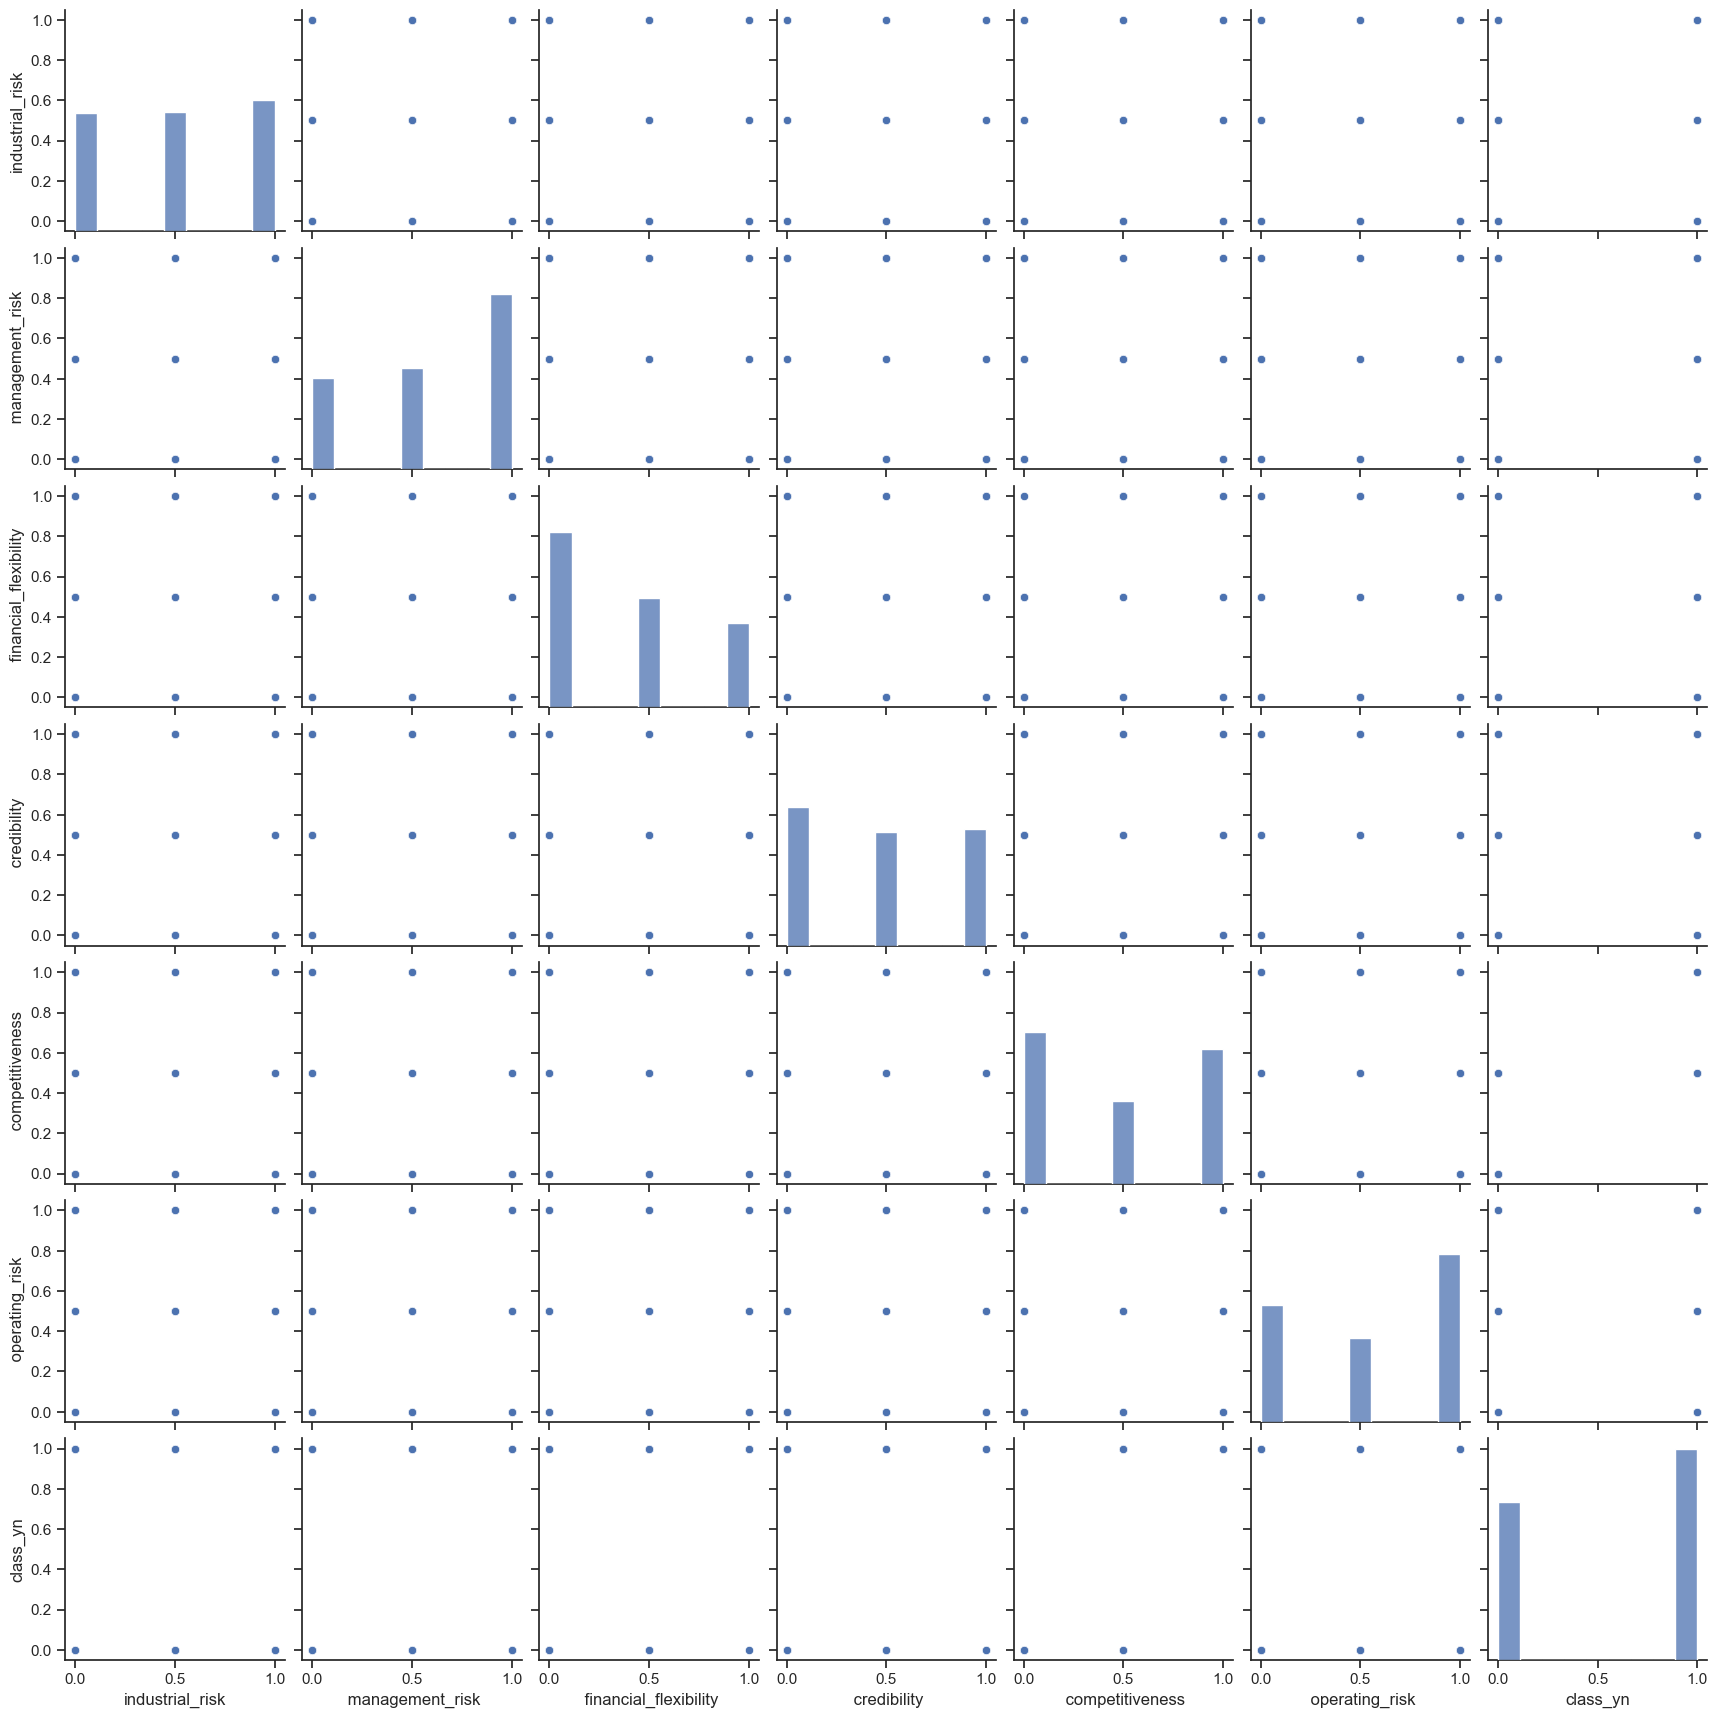

In [17]:
sns.set(style = "ticks")
sns.pairplot(data, diag_kind = 'hist')

<Axes: xlabel='class_yn', ylabel='count'>

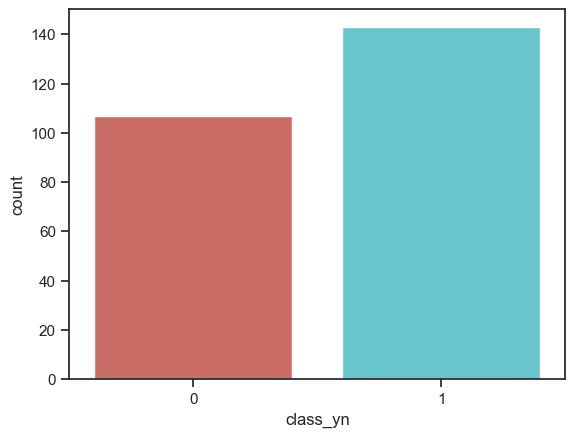

In [18]:
sns.countplot(x = 'class_yn', data = data, palette = 'hls')

<Axes: xlabel='industrial_risk', ylabel='count'>

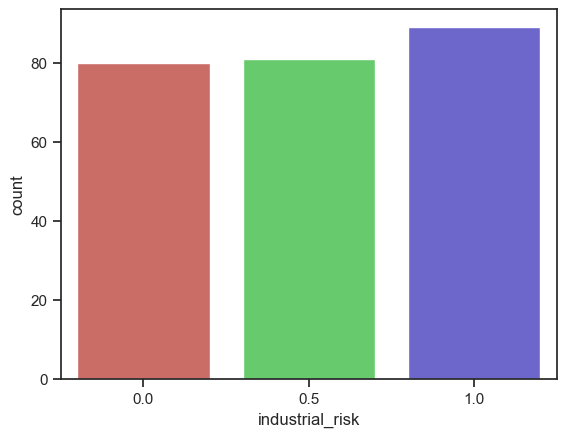

In [19]:
sns.countplot(x = 'industrial_risk', data = data, palette = 'hls')

<Axes: xlabel='class_yn'>

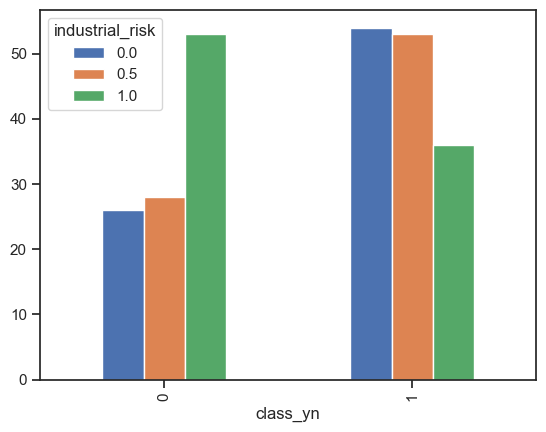

In [20]:
# for visualization 

pd.crosstab(data.class_yn, data.industrial_risk).plot(kind='bar')

<Axes: xlabel=' financial_flexibility'>

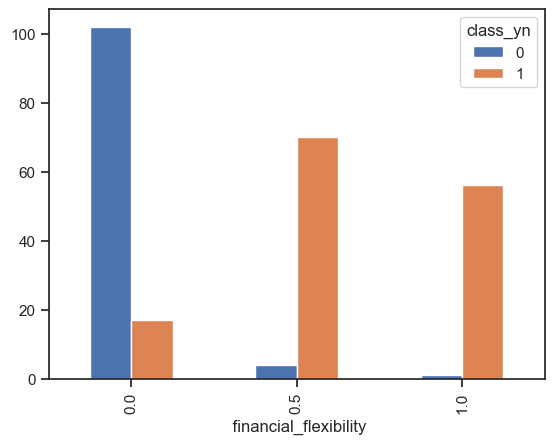

In [21]:
pd.crosstab(data[' financial_flexibility'], data['class_yn']).plot(kind = 'bar')

<Axes: xlabel=' credibility'>

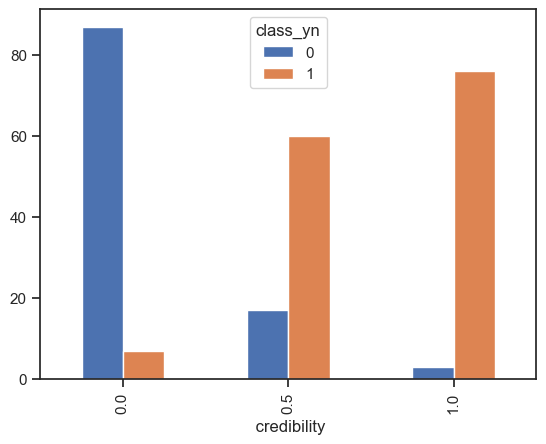

In [22]:
pd.crosstab(data[' credibility'], data.class_yn).plot(kind = 'bar')

<Axes: xlabel=' operating_risk'>

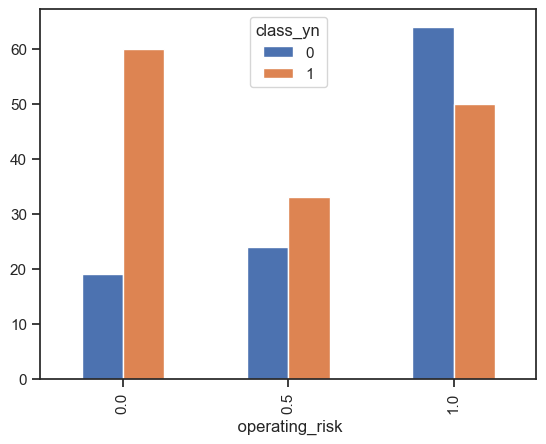

In [23]:
pd.crosstab(data[' operating_risk'], data.class_yn).plot(kind='bar')

<Axes: xlabel=' financial_flexibility'>

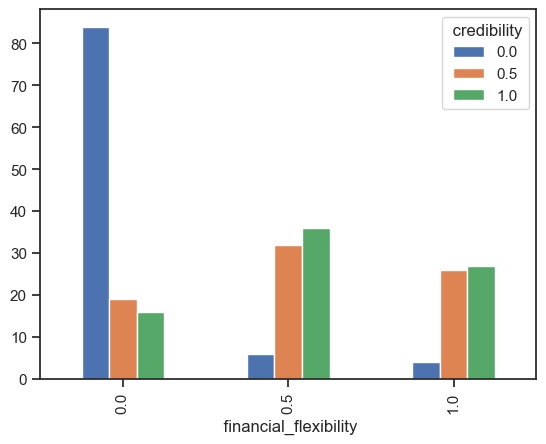

In [24]:
pd.crosstab(data[' financial_flexibility'], data[' credibility']).plot(kind = 'bar')

In [25]:
data.shape

(250, 7)

In [26]:
data.columns

Index(['industrial_risk', ' management_risk', ' financial_flexibility',
       ' credibility', ' competitiveness', ' operating_risk', 'class_yn'],
      dtype='object')

In [27]:
#preparing the data for the model

x = data.drop('class_yn', axis = 1).values
y = data['class_yn'].values

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [29]:
##Preparing models

##1. Logistic Regression

In [30]:
logisticclassifier = LogisticRegression()
logisticclassifier

LogisticRegression()

In [31]:
logisticclassifier.fit(x_train, y_train)
logisticclassifier.coef_

array([[-0.47708154, -0.76388501,  2.44455271,  2.37453278,  3.75882044,
        -0.48513004]])

In [32]:
y_pred = logisticclassifier.predict(x_test)
y_pred

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1], dtype=int64)

In [33]:
##let's test the performance of  model - confusion matrix

confusion_logistic= confusion_matrix(y_test, y_pred)
confusion_logistic

array([[18,  0],
       [ 0, 32]], dtype=int64)

In [34]:
##Accuracy of a Model

# Train Accuracy

train_acc_logist = np.mean(logisticclassifier.predict(x_train)== y_train)
train_acc_logist

0.995

In [35]:
### Test Accuracy

test_acc_logist = np.mean(logisticclassifier.predict(x_test)== y_test)
test_acc_logist

1.0

In [36]:
logistic_acc = accuracy_score(y_test, y_pred)
logistic_acc

1.0

In [37]:
##Accuracy of overall model

logisticclassifier.fit(x, y)

logisticclassifier.coef_ # coefficients of features

array([[-0.5741981 , -0.75397787,  2.61063166,  2.41434068,  4.00955826,
        -0.51358089]])

In [38]:
y_pred = logisticclassifier.predict(x)

conf_matrix = confusion_matrix(y, y_pred)
conf_matrix

array([[106,   1],
       [  0, 143]], dtype=int64)

In [39]:
acc = accuracy_score(y, y_pred)
acc

0.996

In [40]:
logisticclassifier.score(x_test, y_test)

1.0

In [41]:
logisticclassifier.score(x_train, y_train)

0.995

In [42]:
##From the accuracy we can say that the model is overfitted to avoid overfit problem we use Regularozation method.

##here we have L1, L2 regularization

##It turns out they have different but equally useful properties. From a practical standpoint, L1 tends to shrink coefficients to zero whereas L2 tends to shrink coefficients evenly. L1 is therefore useful for feature selection, as we can drop any variables associated with coefficients that go to zero.

##L1 = lasso regularization

In [43]:
lasso_reg = linear_model.Lasso(alpha = 50, max_iter = 100, tol = 0.1)
lasso_reg

lasso_reg.fit(x_train, y_train)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [44]:
lasso_reg.score(x_test, y_test)

-0.03135850694444442

In [45]:
lasso_reg.score(x_train, y_train)

0.0

In [46]:
##L2 = Ridge regularization

In [47]:
ridge_reg = Ridge(alpha = 50, max_iter = 100, tol = 0.1)
ridge_reg

ridge_reg.fit(x_train, y_train)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [48]:
ridge_reg.score(x_test, y_test)

0.7850284233929683

In [49]:
ridge_reg.score(x_train, y_train)

0.757416453720328

In [50]:
## 2.KNN model

In [51]:
import warnings
warnings.filterwarnings('ignore')

In [52]:
##To choose k value

In [53]:
import math
math.sqrt(len(y_test))

7.0710678118654755

In [54]:
##Here we are choosing the k value to be 7 (choosing odd value)

##Define the model KNN and fit model

In [55]:
KNN_classifier = KNC(n_neighbors = 7, p = 2, metric = 'euclidean')

In [56]:
KNN_classifier.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=7)

In [57]:
##Predict the Test set results

In [58]:
y_pred = KNN_classifier.predict(x_test)
y_pred

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1], dtype=int64)

In [59]:
##Evaluate model

In [60]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[18  0]
 [ 1 31]]


In [61]:
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred))

0.9841269841269841


In [62]:
##Accuracy of KNN model

In [63]:
KNN_acc = accuracy_score(y_test, y_pred)
KNN_acc

0.98

In [64]:
##3. Naive Bayes Classifier

In [65]:
##Creating GaussianNB and MultinomialNB functions

GNB = GaussianNB()
MNB = MultinomialNB()

In [66]:
##Building the model with GaussianNB

Naive_GNB = GNB.fit(x_train, y_train)

y_pred = Naive_GNB.predict(x_test)
y_pred

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1], dtype=int64)

In [67]:
##Evaluate Model

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[18  0]
 [ 0 32]]


In [68]:
##Accuracy of GNB

GNB_acc = accuracy_score(y_test, y_pred)
GNB_acc

1.0

In [69]:
##Building the model with MultinomialNB

In [70]:
Naive_MNB = MNB.fit(x_train, y_train)

y_pred = Naive_MNB.predict(x_test)
y_pred

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1], dtype=int64)

In [71]:
##Evaluating Model

cm = confusion_matrix(y_test, y_pred)
cm

array([[18,  0],
       [ 0, 32]], dtype=int64)

In [72]:
##Accuracy of MNB

MNB_acc = accuracy_score(y_test, y_pred)
MNB_acc

1.0

In [73]:
##4. Support Vector Machine

In [74]:
##Kernel = Linear model

model_linear = SVC(kernel = 'linear')
model_linear.fit(x_train, y_train)

pred_test_linear = model_linear.predict(x_test)
np.mean(pred_test_linear==y_test)

1.0

In [75]:
##Kernel = ploy model

model_poly = SVC(kernel = "poly")
model_poly.fit(x_train,y_train)

pred_test_poly = model_poly.predict(x_test)
np.mean(pred_test_poly==y_test)

0.98

In [76]:
##Kernel = 'rbf' model --> Radial Basis Function

model_rbf = SVC(kernel = "rbf")
model_rbf.fit(x_train,y_train)

pred_test_rbf = model_rbf.predict(x_test)
np.mean(pred_test_rbf==y_test)          # Accuracy

1.0

In [77]:
print(classification_report(y_test, pred_test_poly))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       1.00      0.97      0.98        32

    accuracy                           0.98        50
   macro avg       0.97      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



In [80]:
import pickle
pickle.dump(model_poly, open('model_poly.pkl', 'wb'))

In [82]:
pickled_model_poly = pickle.load(open('model_poly.pkl', 'rb'))

In [83]:
pickled_model_poly.predict(x_test)

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1], dtype=int64)